**NAME : ADITYA GUSAIN**

**Task 1 : THE SPARKS FOUNDATION May'21**

**Predict the percentage of an student based on the no. of study hours.**

Aim --

**This is a simple regression task where we have to predict the percentage of a student based on the no. of study hours. also we have to predict the score if a student studies for 9.25 hrs/day**





In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('/content/Book1.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Dataset reading**

In [25]:
df.shape

(25, 2)

**1. Data Visualization**

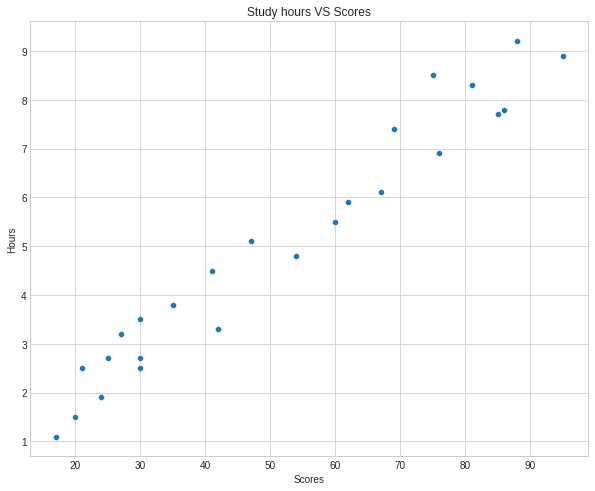

In [26]:
plt.figure(figsize=(10,8))
plt.title('Study hours VS Scores')
sns.scatterplot(x = 'Scores' , y = 'Hours', data =df)
plt.show()


Number of Hours increases Score is also increases so that the relation between Hours and Score(percentage) is Positive

Relationship between Hours and Scores

In [27]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


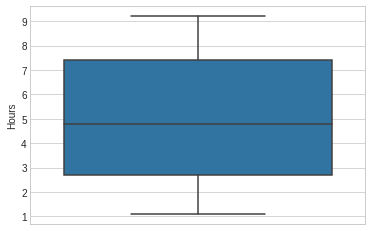

In [28]:
sns.boxplot(data = df , y = df['Hours'])
plt.show()



**2.Data Preparing**

In [31]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values


**3.Train Test Split**

**we will split the dataset into 75% training and 25% testing set.**

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=5)

**4. Model Building**

In [34]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [35]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
reg = model.coef_*X+model.intercept_

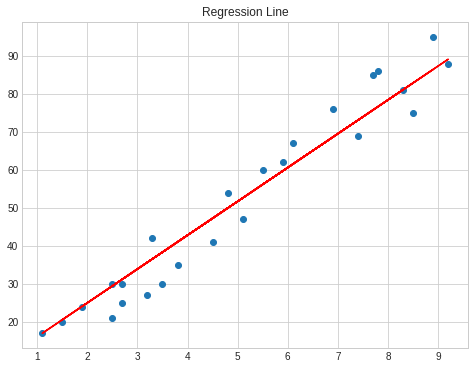

In [37]:
plt.figure(figsize= (8,6))
plt.scatter(X, y)
plt.title('Regression Line')
plt.plot(X, reg, color = 'r');
plt.show()


**5.Predictions and Model Evaluations**

In [38]:
predictions = model.predict(X_test)

In [39]:
predictions[:5]

array([73.10060178, 61.53385008, 35.73109628, 75.76985217, 49.96709838])

In [40]:
y_test[:5]

array([69, 67, 27, 85, 54])

In [41]:
pred_df = pd.DataFrame({'True_Values': y_test, 'Predicted': predictions})

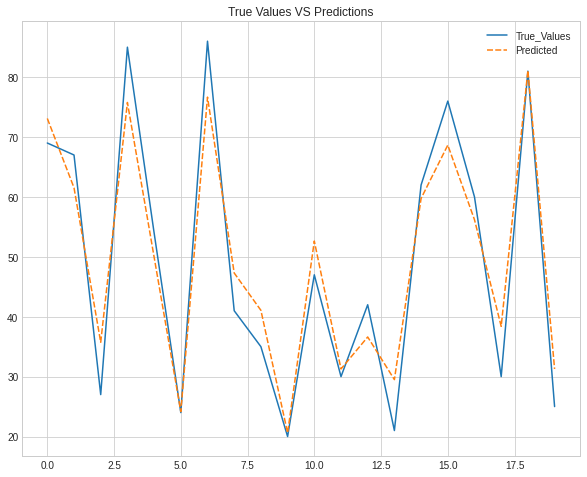

In [42]:
plt.figure(figsize= (10,8))
plt.title('True Values VS Predictions')
sns.lineplot(data = pred_df)
plt.show()


In [43]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error

In [44]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 5.151430860805863
MSE: 35.336530978693766
RMSE: 5.944453799862


**Model Accuracy on Testing Dataset**

In [45]:
print('Model Accuracy:',model.score(X_test, y_test))

Model Accuracy: 0.9278978739033775


**6.Predict the score if a student studies for 9.25 hours/day**

In [46]:
def predict(hours):
    pred_score=model.predict(hours)
    return round(pred_score[0],2)
print('Predicted Score is:',predict([[9.25]]))

Predicted Score is: 89.56
